# Sentiment Analysis on Dutch Reviews

In this notebook, we will process and analyze Dutch reviews, performing tasks such as language detection, tokenization, sentiment analysis, and visualization of results.

In [1]:
# Install necessary packages
!pip install langdetect emoji
!python -m spacy download nl_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 43.4 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=2f28027b0c3aabad382cf4383003eb0f464fe3e8c03e01d531cc9006580d2a25
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('nl_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Installing Required Packages



In [2]:
# Importing Required Libraries
import torch
import numpy as np
import re
import emoji
import pandas as pd
import spacy
import random
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory
from transformers import pipeline, AutoTokenizer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Set display option to show full content of columns
pd.set_option('display.max_colwidth', None)  # No truncation of column width

###Checking GPU Availability



In [4]:
# Check if GPU is available for PyTorch
print(torch.cuda.is_available())  # This should print 'True' if GPU is available.

True


### Mounting Google Drive

In [5]:
# Mount Google Drive to access the dataset
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Loading the Dataset


In [6]:
# Load dataset using pandas
movie_df = pd.read_csv('/content/gdrive/MyDrive/workspace_365/ReviewsTestSet_1.csv', encoding='latin1')
movie_df.head(3)

,Reviews
0,"- Jim Blandings (Cary Grant) is de ratrace en de krappe levensomstandigheden van New York City beu geworden en vindt een huis op het platteland voor zijn vrouw en kinderen. Hij hoopt het eenvoudige leven te vinden. Maar een huis bouwen blijkt allesbehalve eenvoudig. Terwijl de hoofdpijn en de rekeningen zich opstapelen, geldt dat ook voor het lachen. Zal meneer Blanding ooit zijn droomhuis krijgen? <br /><br />- Wat deze film zo speciaal maakt, zijn de drie hoofdacteurs: Grant, Myrna Loy en Melvyn Douglas. Alle drie zijn in staat om op zichzelf een film te maken, dus als je hun talenten combineert, is bijna elke scène speciaal. Grant is altijd mijn favoriet geweest in dit soort rollen. Hij is zo goed in het spelen van de opgedragen echtgenoot. Loy is altijd een genot om naar te kijken. De Thin Man-films die ze samen met William Powell maakte zijn bijna perfect. En Douglas is de afgelopen twee of drie jaar een favoriet van mij geworden. Douglas verscheen ook in The Old Dark House, een van mijn favorieten.<br /><br />- De film is absoluut een product van zijn tijd. Ik krijg er een kick van als ik me een tijd kan voorstellen waarin je een huis van twee verdiepingen, drie slaapkamers en vier badkamers zou kunnen bouwen met een inkomen van $ 15.000 per jaar. Tel daar nog bij dat je twee kinderen naar een privéschool gaan en dat je een inwonende meid hebt, en het wordt bijna fantasievol.<br /><br />- Maar voor iedereen die een huis heeft gekocht of gebouwd, zijn veel van de situaties en de hachelijke situatie waarin de Blanding zich bevindt, is gemakkelijk te relateren aan vandaag. En dat is waar de komedie om de hoek komt kijken. Hoeveel mensen hebben enkele van de domme dingen gedaan die het stel in deze film doet, om uiteindelijk meer geld te kosten dan verwacht? - De grootste klacht die ik heb over meneer Blandings is het hele subplot 'vrouw verliefd op beste vriend'. Het is echt niet nodig voor de plot en voelt misplaatst en erg ongemakkelijk zoals gepresenteerd."
1,"- Nadat hun zoons zijn veroordeeld tot levenslang in de gevangenis, krijgen Adelle (Debbie Reynolds) en Helen (Shirley Winters) bedreigende telefoontjes omdat iemand vindt dat hun zoons er gemakkelijk vanaf zijn gekomen. Het tweetal besluit naar Californië te verhuizen om aan de publiciteit van het proces te ontsnappen en een nieuw leven te beginnen. Ze starten een dansschool die al snel zeer succesvol is. Een van de studenten heeft een rijke, ongehuwde vader op wie Adelle al snel verliefd wordt. Ondertussen is Helen druk bezig met het grootbrengen van konijnen en wordt ze een beetje te verliefd op een evangelist op de radio. Het is slechts een kwestie van tijd voordat alles uit elkaar valt en de vrouwen een wereld van waanzin en moord betreden.<br /><br />- Ik kan het niet laten om What's the Matter te vergelijken met Helen? aan Whoever Slew Auntie Roo?, met ook Shelly Winters in de hoofdrol. Waar die film bijna ingetogen leek in de presentatie van de waanzin van tante Roo, is er niets dat Helen tegenhoudt in deze film. Het kan een groot deel van de speelduur van de film in beslag nemen, maar zodra ze snapt, is Helen een Bad Mad Mutha. Je wilt geen ruzie met haar maken. Winters is zo heerlijk dementerend dat ik onmogelijk niet van haar optreden kon genieten. Ik ga de film niet bederven, maar de dingen waartoe Helen in staat is totaal overdreven.<br /><br />- Hoe goed Winters ook is, Reynolds is volkomen belachelijk in haar rol als het goud -gravende tapdanser. Ik kreeg de indruk dat ze dacht dat ze in een film speelde waarvoor ze genomineerd zou worden voor een of andere prijs. Dit is geen burger Kane! Houd op met zo serieus te doen. Hé, Debbie, besef je niet dat het je voornaamste doel is om slachtoffer te worden van Winters' waanzin.<br /><br />- Ik hou gewoon van deze voormalige vrouwelijke sterren in de schemering- horrorfilms uit hun carrière. Wat is er met Helen aan de hand? is net zo leuk als wat dan ook."
2,"Now in India's sunny 'clime, where I

### Language Detection

In [7]:
# Ensure reproducibility of language detection
DetectorFactory.seed = 0

# Detect language of each review
movie_df['language'] = movie_df['Reviews'].apply(detect)

# Filter reviews written in Dutch (language code 'nl')
dutch_reviews_df = movie_df[movie_df['language'] == 'nl']
dutch_reviews_df.head(3)

,Reviews,language
0,"- Jim Blandings (Cary Grant) is de ratrace en de krappe levensomstandigheden van New York City beu geworden en vindt een huis op het platteland voor zijn vrouw en kinderen. Hij hoopt het eenvoudige leven te vinden. Maar een huis bouwen blijkt allesbehalve eenvoudig. Terwijl de hoofdpijn en de rekeningen zich opstapelen, geldt dat ook voor het lachen. Zal meneer Blanding ooit zijn droomhuis krijgen? <br /><br />- Wat deze film zo speciaal maakt, zijn de drie hoofdacteurs: Grant, Myrna Loy en Melvyn Douglas. Alle drie zijn in staat om op zichzelf een film te maken, dus als je hun talenten combineert, is bijna elke scène speciaal. Grant is altijd mijn favoriet geweest in dit soort rollen. Hij is zo goed in het spelen van de opgedragen echtgenoot. Loy is altijd een genot om naar te kijken. De Thin Man-films die ze samen met William Powell maakte zijn bijna perfect. En Douglas is de afgelopen twee of drie jaar een favoriet van mij geworden. Douglas verscheen ook in The Old Dark House, een van mijn favorieten.<br /><br />- De film is absoluut een product van zijn tijd. Ik krijg er een kick van als ik me een tijd kan voorstellen waarin je een huis van twee verdiepingen, drie slaapkamers en vier badkamers zou kunnen bouwen met een inkomen van $ 15.000 per jaar. Tel daar nog bij dat je twee kinderen naar een privéschool gaan en dat je een inwonende meid hebt, en het wordt bijna fantasievol.<br /><br />- Maar voor iedereen die een huis heeft gekocht of gebouwd, zijn veel van de situaties en de hachelijke situatie waarin de Blanding zich bevindt, is gemakkelijk te relateren aan vandaag. En dat is waar de komedie om de hoek komt kijken. Hoeveel mensen hebben enkele van de domme dingen gedaan die het stel in deze film doet, om uiteindelijk meer geld te kosten dan verwacht? - De grootste klacht die ik heb over meneer Blandings is het hele subplot 'vrouw verliefd op beste vriend'. Het is echt niet nodig voor de plot en voelt misplaatst en erg ongemakkelijk zoals gepresenteerd.",nl
1,"- Nadat hun zoons zijn veroordeeld tot levenslang in de gevangenis, krijgen Adelle (Debbie Reynolds) en Helen (Shirley Winters) bedreigende telefoontjes omdat iemand vindt dat hun zoons er gemakkelijk vanaf zijn gekomen. Het tweetal besluit naar Californië te verhuizen om aan de publiciteit van het proces te ontsnappen en een nieuw leven te beginnen. Ze starten een dansschool die al snel zeer succesvol is. Een van de studenten heeft een rijke, ongehuwde vader op wie Adelle al snel verliefd wordt. Ondertussen is Helen druk bezig met het grootbrengen van konijnen en wordt ze een beetje te verliefd op een evangelist op de radio. Het is slechts een kwestie van tijd voordat alles uit elkaar valt en de vrouwen een wereld van waanzin en moord betreden.<br /><br />- Ik kan het niet laten om What's the Matter te vergelijken met Helen? aan Whoever Slew Auntie Roo?, met ook Shelly Winters in de hoofdrol. Waar die film bijna ingetogen leek in de presentatie van de waanzin van tante Roo, is er niets dat Helen tegenhoudt in deze film. Het kan een groot deel van de speelduur van de film in beslag nemen, maar zodra ze snapt, is Helen een Bad Mad Mutha. Je wilt geen ruzie met haar maken. Winters is zo heerlijk dementerend dat ik onmogelijk niet van haar optreden kon genieten. Ik ga de film niet bederven, maar de dingen waartoe Helen in staat is totaal overdreven.<br /><br />- Hoe goed Winters ook is, Reynolds is volkomen belachelijk in haar rol als het goud -gravende tapdanser. Ik kreeg de indruk dat ze dacht dat ze in een film speelde waarvoor ze genomineerd zou worden voor een of andere prijs. Dit is geen burger Kane! Houd op met zo serieus te doen. Hé, Debbie, besef je niet dat het je voornaamste doel is om slachtoffer te worden van Winters' waanzin.<br /><br />- Ik hou gewoon van deze voormalige vrouwelijke sterren in de schemering- horrorfilms uit hun carrière. Wat is er met Helen aan de hand? is net zo leuk als wat dan ook.",nl
4,"""Strange Case"" is n

### Tokenization and Visualization of Review Lengths

<ipython-input-8-290f5ac42864>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dutch_reviews_df['Token Count'] = dutch_reviews_df['Reviews'].apply(lambda x: len(nlp(x)))


Total reviews processed: 4314
Number of short reviews (<= 512 tokens): 3770
Number of long reviews (> 512 tokens): 544
Short Reviews: 3770 (87.39%)
Long Reviews: 544 (12.61%)


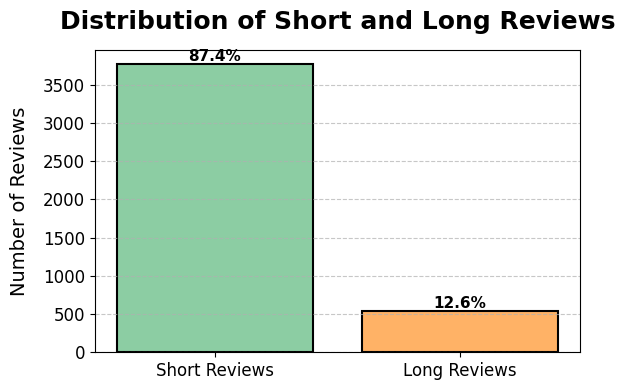

In [8]:
# Load spaCy Dutch language model
nlp = spacy.load("nl_core_news_sm")

# Tokenize reviews and calculate token counts
dutch_reviews_df['Token Count'] = dutch_reviews_df['Reviews'].apply(lambda x: len(nlp(x)))

# Filter reviews by token count
short_reviews = dutch_reviews_df[dutch_reviews_df['Token Count'] <= 512]
long_reviews = dutch_reviews_df[dutch_reviews_df['Token Count'] > 512]

# Display review counts
print(f"Total reviews processed: {len(dutch_reviews_df)}")
print(f"Number of short reviews (<= 512 tokens): {len(short_reviews)}")
print(f"Number of long reviews (> 512 tokens): {len(long_reviews)}")

# Prepare data for bar chart
categories = ['Short Reviews', 'Long Reviews']
counts = [len(short_reviews), len(long_reviews)]
percentages = [(count / sum(counts)) * 100 for count in counts]

# Detailed printout of percentages
for category, count, percentage in zip(categories, counts, percentages):
    print(f"{category}: {count} ({percentage:.2f}%)")

# Plot bar chart with transparency
short_color = (0.25, 0.68, 0.40, 0.6)
long_color = (1.0, 0.5, 0.0, 0.6)

plt.figure(figsize=(6, 4))
bars = plt.bar(categories, counts, color=[short_color, long_color], edgecolor='black', linewidth=1.5)

# Annotate bars with percentages
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Enhance chart appearance
plt.title("Distribution of Short and Long Reviews", fontsize=18, fontweight='bold', pad=15)
plt.ylabel("Number of Reviews", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Word and Token Count Analysis

Average Word Count: 254.9673157162726
Average Token Count: 286.413769123783


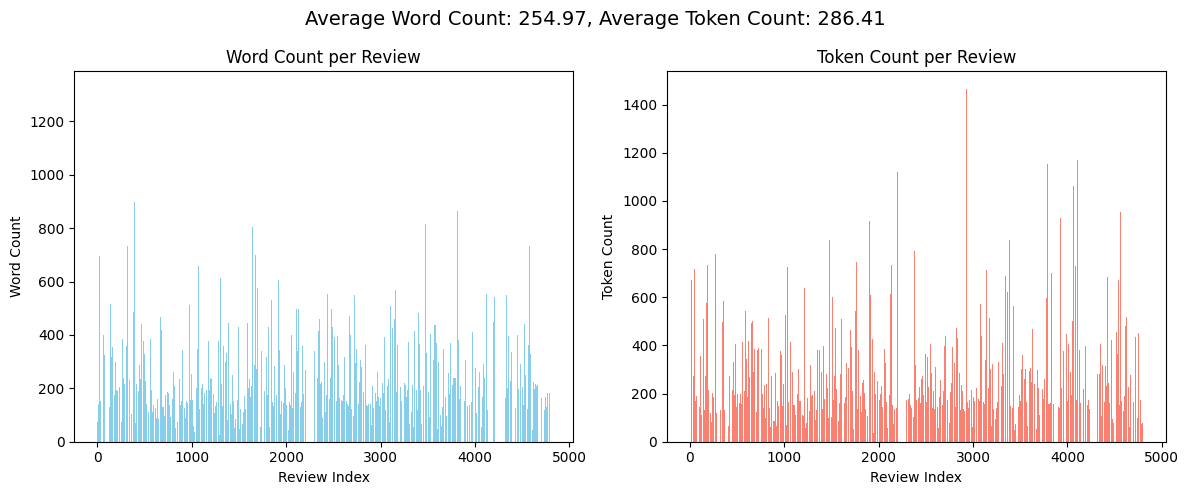

In [9]:
# Function to get word count and token count statistics
def get_text_statistics(df, nlp):
    word_counts = df['Reviews'].apply(lambda x: len(x.split()))
    token_counts = df['Reviews'].apply(lambda x: len(nlp(x)))
    avg_word_count = word_counts.mean()
    avg_token_count = token_counts.mean()
    return word_counts, token_counts, avg_word_count, avg_token_count

# Calculate statistics
word_counts, token_counts, avg_word_count, avg_token_count = get_text_statistics(dutch_reviews_df, nlp)

# Display results
print(f"Average Word Count: {avg_word_count}")
print(f"Average Token Count: {avg_token_count}")

# Plotting Word and Token Counts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Word Count per Review
axes[0].bar(dutch_reviews_df.index, word_counts, color='skyblue')
axes[0].set_title('Word Count per Review')
axes[0].set_xlabel('Review Index')
axes[0].set_ylabel('Word Count')

# Plot Token Count per Review
axes[1].bar(dutch_reviews_df.index, token_counts, color='salmon')
axes[1].set_title('Token Count per Review')
axes[1].set_xlabel('Review Index')
axes[1].set_ylabel('Token Count')

# Display average values
fig.suptitle(f"Average Word Count: {avg_word_count:.2f}, Average Token Count: {avg_token_count:.2f}", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


### Word Frequency Distribution

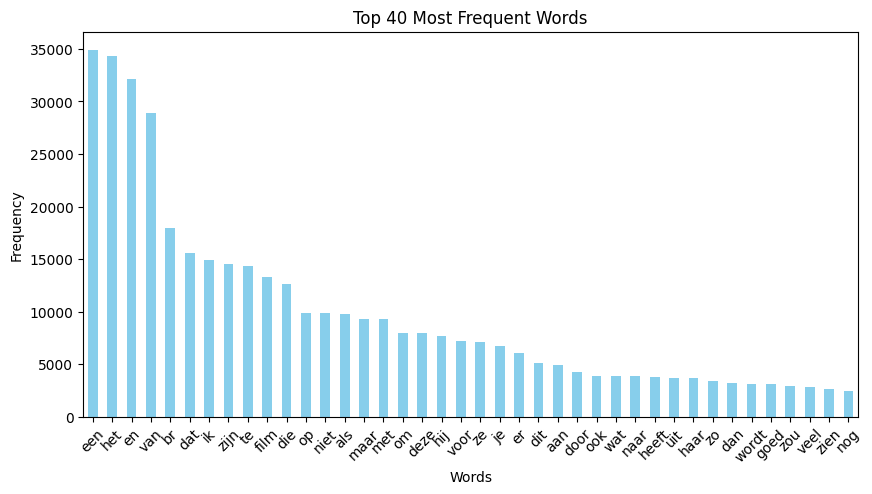

In [10]:
# Function to create a word frequency distribution chart
def plot_word_frequency(df):
    vectorizer = CountVectorizer(stop_words='english', max_features=40)
    word_count = vectorizer.fit_transform(df['Reviews'])
    word_freq = pd.DataFrame(word_count.toarray(), columns=vectorizer.get_feature_names_out())
    word_frequencies = word_freq.sum().sort_values(ascending=False).head(40)

    word_frequencies.plot(kind='bar', figsize=(10, 5), color='skyblue')
    plt.title('Top 40 Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Visualize the word frequency distribution
plot_word_frequency(dutch_reviews_df)

### Sentiment Analysis Setup

In [11]:
# Load the Dutch spaCy model
nlp = spacy.load("nl_core_news_sm")

# Define a custom list of stopwords for Dutch
custom_stopwords = {
    'the', 'dit', 'te', 'haar', 'al', 'alles', 'alsof', 'andere', 'anderen', 'aan',
    'bent', 'boven', 'dat', 'daar', 'daarmee', 'de', 'deze', 'die', 'doen', 'doet',
    'ben', 'een', 'door', 'er', 'gewoon', 'had', 'hadden', 'heb', 'hebben', 'heeft',
    'bij', 'en', 'het', 'hoe', 'hun', 'hij', 'ik', 'in', 'is', 'je', 'jij', 'kan',
    'als', 'kunnen', 'laten', 'laat', 'met', 'mijn', 'naar', 'om', 'onze',
    'ons', 'op', 'tot', 'toch', 'uit', 'u', 'van', 'voor', 'waren', 'was',
    'we', 'wel', 'welke', 'werden', 'werd', 'wie', 'wat', 'waar', 'zelfs',
    'zijn', 'ze', 'zal', 'zullen', 'zou', 'zouden', 'zij', 'worden', 'wordt'
}

# Sentiment mapping for emojis
emoji_sentiment = {
    "😊": "positief", "😁": "positief", "😍": "positief", "😂": "positief", "😜": "positief",
    "😢": "negatief", "😭": "negatief", "😞": "negatief", "😠": "negatief", "😡": "negatief",
    "😐": "neutraal", "😑": "neutraal", "😶": "neutraal", "🙄": "neutraal", "😬": "neutraal"
}

# List of common negation words in Dutch
negation_words = ['niet', 'geen', 'nooit', 'niets', 'niemand', 'noch', 'hardly', 'scarcely', 'weinig']

# Extended positive and negative words list for Dutch
positive_words = [
    'positief', 'goed', 'blij', 'liefde', 'uitstekend', 'geweldig', 'fantastisch',
    'verbazingwekkend', 'fantastisch', 'blij', 'vrolijk', 'tevreden', 'hoopvol', 'gelukkig',
    'vriendelijk', 'vrienden', 'plezierig', 'optimistisch', 'wonderlijk', 'beste', 'super'
]

negative_words = [
    'negatief', 'slecht', 'verdrietig', 'haten', 'verschrikkelijk', 'afschuwelijk', 'vreselijk',
    'teleurstellend', 'horrific', 'onfortuinlijk', 'boos', 'miserabel', 'spijtig', 'onvoldaan',
    'frustrerend', 'vreselijk', 'verschrikkelijk', 'depressief', 'somber', 'onprettig', 'treurig'
]

def handle_negations(tokens):
    """
    Adjusts the sentiment of tokens based on the presence of negation words (in Dutch).
    """
    tokens_with_negation_handling = []
    negate_next_token = False

    for token in tokens:
        if token in negation_words:
            negate_next_token = True
        elif negate_next_token:
            if token in positive_words:  # Positive words
                tokens_with_negation_handling.append('negatief')
            elif token in negative_words:  # Negative words
                tokens_with_negation_handling.append('positief')
            else:
                tokens_with_negation_handling.append(token)
            negate_next_token = False  # Reset negation flag
        else:
            tokens_with_negation_handling.append(token)

    return tokens_with_negation_handling

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [12]:
def preprocess_review(review):
    """
    Preprocesses a review using spaCy (tokenization, lemmatization), with custom stopword handling,
    retains sentiment-carrying emojis and emoticons, and handles negations.
    """
    # Remove HTML tags using regular expressions
    review = re.sub(r'<.*?>', '', review)

    # Convert to lowercase
    review = review.lower()

    # Remove special characters, numbers, and punctuation (keeping only letters and spaces)
    review = re.sub(r'[^a-zA-Z\s]', '', review)

    # Extract emojis from the review and map them to sentiment
    emojis_in_review = emoji.distinct_emoji_list(review)
    sentiment_from_emojis = [emoji_sentiment.get(emo, 'neutral') for emo in emojis_in_review]

    # Process the review with spaCy
    doc = nlp(review)

    # Tokenize and lemmatize the review, removing only the custom stopwords and punctuation
    tokens = [token.lemma_ for token in doc if token.text not in custom_stopwords and not token.is_punct]

    # Handle negations in the tokens
    tokens = handle_negations(tokens)

    # Add emoji sentiment to the tokens list
    tokens.extend(sentiment_from_emojis)

    # Join tokens back into a cleaned sentence and convert to lowercase
    cleaned_review = ' '.join(tokens).lower()

    return cleaned_review

In [13]:
# Apply preprocessing to the reviews and assign to the final DataFrame
cleaned_dutch_reviews_df = dutch_reviews_df.copy()
cleaned_dutch_reviews_df['cleaned_review'] = cleaned_dutch_reviews_df['Reviews'].apply(preprocess_review)

In [14]:
cleaned_dutch_reviews_df.head(3)

,Reviews,language,Token Count,cleaned_review
0,"- Jim Blandings (Cary Grant) is de ratrace en de krappe levensomstandigheden van New York City beu geworden en vindt een huis op het platteland voor zijn vrouw en kinderen. Hij hoopt het eenvoudige leven te vinden. Maar een huis bouwen blijkt allesbehalve eenvoudig. Terwijl de hoofdpijn en de rekeningen zich opstapelen, geldt dat ook voor het lachen. Zal meneer Blanding ooit zijn droomhuis krijgen? <br /><br />- Wat deze film zo speciaal maakt, zijn de drie hoofdacteurs: Grant, Myrna Loy en Melvyn Douglas. Alle drie zijn in staat om op zichzelf een film te maken, dus als je hun talenten combineert, is bijna elke scène speciaal. Grant is altijd mijn favoriet geweest in dit soort rollen. Hij is zo goed in het spelen van de opgedragen echtgenoot. Loy is altijd een genot om naar te kijken. De Thin Man-films die ze samen met William Powell maakte zijn bijna perfect. En Douglas is de afgelopen twee of drie jaar een favoriet van mij geworden. Douglas verscheen ook in The Old Dark House, een van mijn favorieten.<br /><br />- De film is absoluut een product van zijn tijd. Ik krijg er een kick van als ik me een tijd kan voorstellen waarin je een huis van twee verdiepingen, drie slaapkamers en vier badkamers zou kunnen bouwen met een inkomen van $ 15.000 per jaar. Tel daar nog bij dat je twee kinderen naar een privéschool gaan en dat je een inwonende meid hebt, en het wordt bijna fantasievol.<br /><br />- Maar voor iedereen die een huis heeft gekocht of gebouwd, zijn veel van de situaties en de hachelijke situatie waarin de Blanding zich bevindt, is gemakkelijk te relateren aan vandaag. En dat is waar de komedie om de hoek komt kijken. Hoeveel mensen hebben enkele van de domme dingen gedaan die het stel in deze film doet, om uiteindelijk meer geld te kosten dan verwacht? - De grootste klacht die ik heb over meneer Blandings is het hele subplot 'vrouw verliefd op beste vriend'. Het is echt niet nodig voor de plot en voelt misplaatst en erg ongemakkelijk zoals gepresenteerd.",nl,385,jimgen blandings cary grant ratrace krappe levensomstandigheen new york city beu worden vinden huis platteland vrouw kind hopen eenvoudig leven vinden maar huis bouwen blijken allesbehalve eenvoudig terwijl hoofdpijn rekening zich opstapelen gelden ook lachen meneer blanding ooit droomhuis krijgen film zo speciaal maken drie hoofdacteur grant myrna loy melvyn douglas al drie staat zichzelf film maken dus talent combineren bijna elk scne speciaal grant altijd favoriet zijn soort rollen zo goed spelen opdragen echtgenoot loy altijd genot aankijken thin manfilm samen william powell maken bijna perfect douglas aflopen twee of drie jaar favoriet mij worden douglas verschijnen ook old dark house favoriet film absoluut product tijd krijgen kick me tijd voorstellen waarin huis twee verdieping drie slaapkamer vier badkamer bouwen inkomen per jaar tel nog twee kind privschool gaan inwonen meid hebben bijna fantasievol maar iedereen huis kopen of bouwen veel situatie hachelijk situatie waarin blanding zich bevinden gemakkelijk relateren vandaag komedie hoek komen kijken hoeveel mens enkel domm ding doen stel film uiteindelijk veel geld kosten dan verwachten groot klacht over meneer blandings heel subplot vrouw verliefd goed vriend echt nodig plot voelen misplaatst erg ongemakkelijk zoals presenteren
1,"- Nadat hun zoons zijn veroordeeld tot levenslang in de gevangenis, krijgen Adelle (Debbie Reynolds) en Helen (Shirley Winters) bedreigende telefoontjes omdat iemand vindt dat hun zoons er gemakkelijk vanaf zijn gekomen. Het tweetal besluit naar Californië te verhuizen om aan de publiciteit van het proces te ontsnappen en een nieuw leven te beginnen. Ze starten een dansschool die al snel zeer succesvol is. Een van de studenten heeft een rijke, ongehuwde vader op wie Adelle al snel verliefd wordt. Ondertussen is Helen druk bezig met het grootbrengen van konijnen en wordt ze een beetje te verliefd op een evangelist op de radio. 

# K-means clustering

### Keyword Lists

In [15]:
# Define positive and negative keywords for sentiment analysis
positive_keywords = [
    'goed', 'uitstekend', 'blij', 'gelukkig', 'geweldig', 'beste', 'prachtig', 'mooi', 'fantastisch',
    'geweldig', 'heerlijk', 'uitmuntend', 'perfect', 'inspirerend', 'waarderen', 'positief', 'vrolijk',
    'prettig', 'energie', 'tevreden', 'verrassend', 'aangenaam', 'verheugd', 'optimistisch', 'verrukt',
    'uitbundig'
]

negative_keywords = [
    'slecht', 'armzalig', 'haat', 'slechtste', 'verschrikkelijk', 'verdrietig', 'vreselijk', 'afschuwelijk',
    'slechtgemoed', 'teleurstelling', 'miserabel', 'onaanvaardbaar', 'ontgoocheld', 'gefrustreerd', 'angst',
    'irritant', 'afwijzen', 'negatief', 'ellende', 'wanhoop', 'vermijd', 'vijandig', 'weerstand', 'ontevreden',
    'tragisch', 'ontgoocheling', 'somber', 'boos', 'pijn', 'negeren'
]

### TF-IDF Vectorization

In [16]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_dutch_reviews_df['cleaned_review'])

# Show the shape of the TF-IDF matrix (number of reviews x number of features)
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (4314, 5000)


### Clustering (KMeans)

In [17]:
# Define the number of clusters (3 for positive, neutral, and negative)
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Predict the clusters for each review and add the cluster labels to the DataFrame
clusters = kmeans.predict(tfidf_matrix)
cleaned_dutch_reviews_df['cluster'] = clusters

# Display the first few rows of the DataFrame with cluster labels
cleaned_dutch_reviews_df[['cleaned_review', 'cluster']].head(4)

,cleaned_review,cluster
0,jimgen blandings cary grant ratrace krappe levensomstandigheen new york city beu worden vinden huis platteland vrouw kind hopen eenvoudig leven vinden maar huis bouwen blijken allesbehalve eenvoudig terwijl hoofdpijn rekening zich opstapelen gelden ook lachen meneer blanding ooit droomhuis krijgen film zo speciaal maken drie hoofdacteur grant myrna loy melvyn douglas al drie staat zichzelf film maken dus talent combineren bijna elk scne speciaal grant altijd favoriet zijn soort rollen zo goed spelen opdragen echtgenoot loy altijd genot aankijken thin manfilm samen william powell maken bijna perfect douglas aflopen twee of drie jaar favoriet mij worden douglas verschijnen ook old dark house favoriet film absoluut product tijd krijgen kick me tijd voorstellen waarin huis twee verdieping drie slaapkamer vier badkamer bouwen inkomen per jaar tel nog twee kind privschool gaan inwonen meid hebben bijna fantasievol maar iedereen huis kopen of bouwen veel situatie hachelijk situatie waarin blanding zich bevinden gemakkelijk relateren vandaag komedie hoek komen kijken hoeveel mens enkel domm ding doen stel film uiteindelijk veel geld kosten dan verwachten groot klacht over meneer blandings heel subplot vrouw verliefd goed vriend echt nodig plot voelen misplaatst erg ongemakkelijk zoals presenteren,2
1,nadat zoon veroordelen levenslang gevangenis krijgen adel debbie reynolds heal shirley winter bedreigen telefoon omdat iemand vinden zoon gemakkelijk vanaf komen tweetal besluit californi verhuizen publiciteit proces ontsnappen nieuw leven beginnen starten dansschool snel zeer succesvol student rijk ongehuwd vader adel snel verliefd ondertussen heal druk bezig grootbreng konijnen beetje verliefd evangelist radio slechts kwestie tijd voordat elkaar vallen vrouw wereld waanzin moord betreden whats matter vergelijken heal whoever slew auntie roo ook shelly winter hoofdrol film bijna ingetog lijken presentatie waanzin tante roo helen tegenhouden film groot deel speelduur film beslag nemen maar zodra snapt heal bad mad mutha willen ruzie maken winters zo heerlijk dementeren onmogelijk optreden kunnen genieten gaan film bederven maar ding waartoe heal staat totaal overdreven goed winter ook reynold volkomen belachelijk rol goud graven tapdanser krijgen indruk denken film spelen waarvoor nomineren of prijs burger kane houden zo serieus h debbie besef voornaam doel slachtoffer winter waanzin houden voormalig vrouwelijk ster schemering horrorfilm carrir heal hand net zo leuk dan ook,0
4,strang case veel succesvol televisieproject john cleees ooit maken gevoel één versie spoed productie nemen voordat enig herziening kunnen aanbrengen zitten paar dwaze ideen paar slim maar verhaal geheel voegen helaas veel toearthur lowe echter giller net dr watson bionisch beet goed heer,0
5,bevatten klein spoilershet interessant anthony mann hier james stewart gebruiken stewart veel natuurlijk herinneren george bailey frank capras its a wonderful life dus gemakkelijk parallel tussen twee film vinden it a wonderful life krijgen bailey wereld zien zoals zijn geboren far country krijgen stewarts jeff webster zich helpen iemand anders behalve hijzelf wezen hetzelfde zien wereld waarin ondanks al praktisch zaak bestaatdoor betrekken raken proberen iets geven webster dwingen zien degeen ander dan zorg krijgen gewond raken rondgeduwen vermoorden terwijl toekijken kijker denken george bailey kijken wereld kop staan omdat ook besluiten betrekken raken geboren beide film eindigen hetzelfde beeld closeup rinkelen bellen stewart filosofie nietbetrokkenheid draaien vleugel verdienen,2


### PCA for Dimensionality Reduction and Cluster Visualization

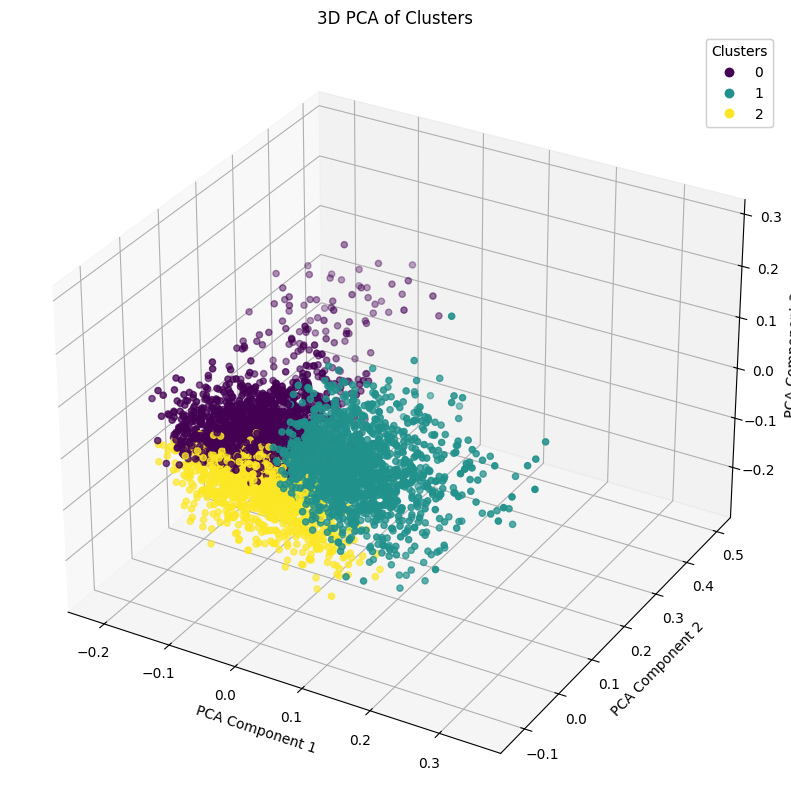

In [18]:
# Apply PCA to reduce the TF-IDF matrix to 3 dimensions
pca = PCA(n_components=3)
pca_components = pca.fit_transform(tfidf_matrix.toarray())

# 3D visualization of clusters using PCA-reduced data
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=clusters, cmap='viridis')

# Add labels and title
ax.set_title('3D PCA of Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

### Sentiment Labeling Function

In [19]:
# Function to label sentiment for each cluster
def label_cluster_sentiment_dutch(cluster_index, order_centroids, terms, positive_keywords, negative_keywords):
    top_terms = [terms[ind] for ind in order_centroids[cluster_index, :20]]  # Top 20 terms for the cluster
    top_terms_str = " ".join(top_terms)

    # Count positive and negative sentiment words
    positive_count = sum(1 for word in top_terms if word in positive_keywords)
    negative_count = sum(1 for word in top_terms if word in negative_keywords)

    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'

### Assigning Sentiment Labels

In [20]:
# Analyzing top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

# Assign sentiment labels to clusters
cluster_sentiments = []
for i in range(num_clusters):
    sentiment_label = label_cluster_sentiment_dutch(i, order_centroids, terms, positive_keywords, negative_keywords)
    cluster_sentiments.append(sentiment_label)

# Map clusters to sentiment labels
cluster_sentiment_mapping = {i: cluster_sentiments[i] for i in range(num_clusters)}
cleaned_dutch_reviews_df['sentiment'] = cleaned_dutch_reviews_df['cluster'].map(cluster_sentiment_mapping)

# Display the first few rows of the DataFrame with sentiment labels
cleaned_dutch_reviews_df[['Reviews', 'cluster', 'sentiment']].head(3)


,Reviews,cluster,sentiment
0,"- Jim Blandings (Cary Grant) is de ratrace en de krappe levensomstandigheden van New York City beu geworden en vindt een huis op het platteland voor zijn vrouw en kinderen. Hij hoopt het eenvoudige leven te vinden. Maar een huis bouwen blijkt allesbehalve eenvoudig. Terwijl de hoofdpijn en de rekeningen zich opstapelen, geldt dat ook voor het lachen. Zal meneer Blanding ooit zijn droomhuis krijgen? <br /><br />- Wat deze film zo speciaal maakt, zijn de drie hoofdacteurs: Grant, Myrna Loy en Melvyn Douglas. Alle drie zijn in staat om op zichzelf een film te maken, dus als je hun talenten combineert, is bijna elke scène speciaal. Grant is altijd mijn favoriet geweest in dit soort rollen. Hij is zo goed in het spelen van de opgedragen echtgenoot. Loy is altijd een genot om naar te kijken. De Thin Man-films die ze samen met William Powell maakte zijn bijna perfect. En Douglas is de afgelopen twee of drie jaar een favoriet van mij geworden. Douglas verscheen ook in The Old Dark House, een van mijn favorieten.<br /><br />- De film is absoluut een product van zijn tijd. Ik krijg er een kick van als ik me een tijd kan voorstellen waarin je een huis van twee verdiepingen, drie slaapkamers en vier badkamers zou kunnen bouwen met een inkomen van $ 15.000 per jaar. Tel daar nog bij dat je twee kinderen naar een privéschool gaan en dat je een inwonende meid hebt, en het wordt bijna fantasievol.<br /><br />- Maar voor iedereen die een huis heeft gekocht of gebouwd, zijn veel van de situaties en de hachelijke situatie waarin de Blanding zich bevindt, is gemakkelijk te relateren aan vandaag. En dat is waar de komedie om de hoek komt kijken. Hoeveel mensen hebben enkele van de domme dingen gedaan die het stel in deze film doet, om uiteindelijk meer geld te kosten dan verwacht? - De grootste klacht die ik heb over meneer Blandings is het hele subplot 'vrouw verliefd op beste vriend'. Het is echt niet nodig voor de plot en voelt misplaatst en erg ongemakkelijk zoals gepresenteerd.",2,Positive
1,"- Nadat hun zoons zijn veroordeeld tot levenslang in de gevangenis, krijgen Adelle (Debbie Reynolds) en Helen (Shirley Winters) bedreigende telefoontjes omdat iemand vindt dat hun zoons er gemakkelijk vanaf zijn gekomen. Het tweetal besluit naar Californië te verhuizen om aan de publiciteit van het proces te ontsnappen en een nieuw leven te beginnen. Ze starten een dansschool die al snel zeer succesvol is. Een van de studenten heeft een rijke, ongehuwde vader op wie Adelle al snel verliefd wordt. Ondertussen is Helen druk bezig met het grootbrengen van konijnen en wordt ze een beetje te verliefd op een evangelist op de radio. Het is slechts een kwestie van tijd voordat alles uit elkaar valt en de vrouwen een wereld van waanzin en moord betreden.<br /><br />- Ik kan het niet laten om What's the Matter te vergelijken met Helen? aan Whoever Slew Auntie Roo?, met ook Shelly Winters in de hoofdrol. Waar die film bijna ingetogen leek in de presentatie van de waanzin van tante Roo, is er niets dat Helen tegenhoudt in deze film. Het kan een groot deel van de speelduur van de film in beslag nemen, maar zodra ze snapt, is Helen een Bad Mad Mutha. Je wilt geen ruzie met haar maken. Winters is zo heerlijk dementerend dat ik onmogelijk niet van haar optreden kon genieten. Ik ga de film niet bederven, maar de dingen waartoe Helen in staat is totaal overdreven.<br /><br />- Hoe goed Winters ook is, Reynolds is volkomen belachelijk in haar rol als het goud -gravende tapdanser. Ik kreeg de indruk dat ze dacht dat ze in een film speelde waarvoor ze genomineerd zou worden voor een of andere prijs. Dit is geen burger Kane! Houd op met zo serieus te doen. Hé, Debbie, besef je niet dat het je voornaamste doel is om slachtoffer te worden van Winters' waanzin.<br /><br />- Ik hou gewoon van deze voormalige vrouwelijke sterren in de schemering- horrorfilms uit hun carrière. Wat is er met Helen aan de hand? is net zo leuk als wat dan ook.",0,Positive

### Distribution of Sentiments

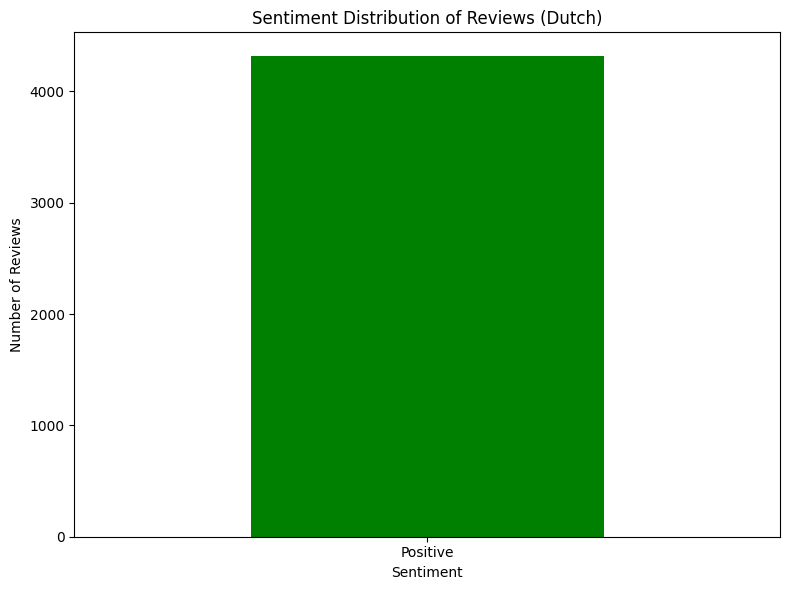

In [21]:
# Optional: Check the distribution of sentiments
sentiment_counts = cleaned_dutch_reviews_df['sentiment'].value_counts()

# Visualize the sentiment distribution in a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution of Reviews (Dutch)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Visualizing the Top 20 Terms for Each Cluster

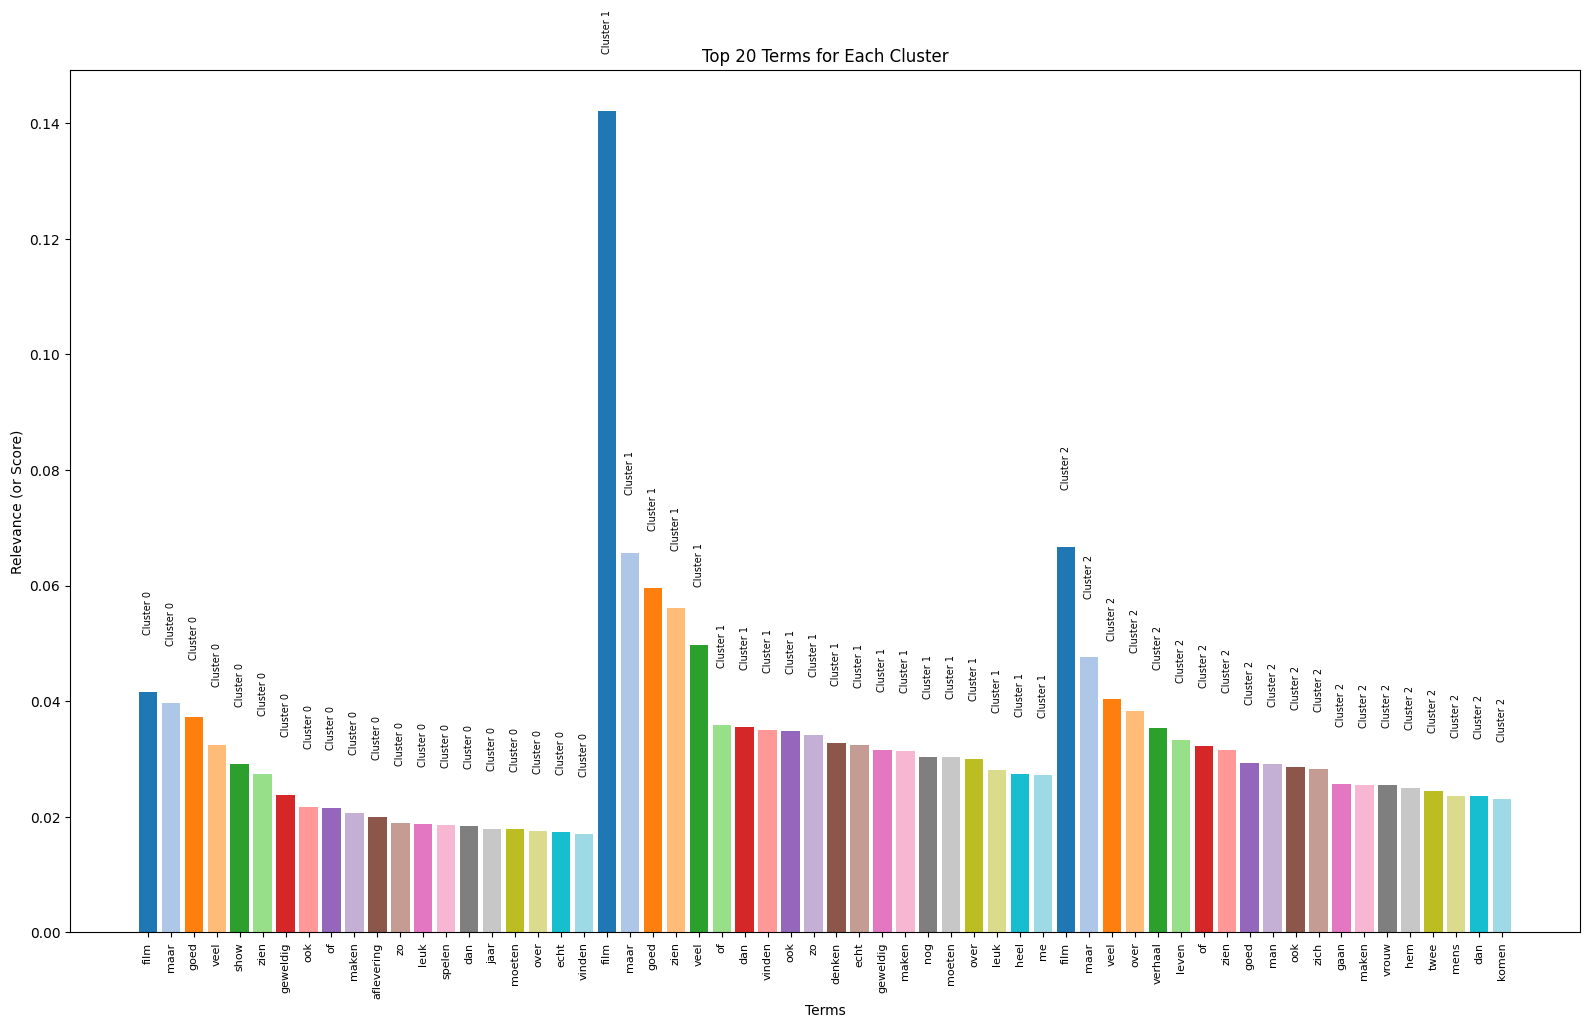

In [22]:
# Visualizing top 20 terms for each cluster
cluster_labels = []
term_labels = []
scores = []  # Placeholder for scores (use actual scores from kmeans.cluster_centers_)

for i in range(num_clusters):
    cluster_terms = [terms[ind] for ind in order_centroids[i, :20]]  # top 20 terms
    cluster_scores = kmeans.cluster_centers_[i, order_centroids[i, :20]]  # get scores
    cluster_labels.extend([f"Cluster {i}"] * 20)
    term_labels.extend(cluster_terms)
    scores.extend(cluster_scores)

# Data for visualization
x = np.arange(len(term_labels))

# Bar chart plotting
plt.figure(figsize=(16, 10))
bar_colors = [plt.cm.tab20(i % 20) for i in range(len(term_labels))]  # Distinct colors for terms

plt.bar(x, scores, color=bar_colors)  # Scores as bar heights
plt.xticks(x, term_labels, rotation=90, fontsize=8)
plt.title("Top 20 Terms for Each Cluster")
plt.ylabel("Relevance (or Score)")
plt.xlabel("Terms")
plt.tight_layout()

# Adding cluster labels as annotations
for i, label in enumerate(cluster_labels):
    plt.text(x[i], scores[i] + 0.01, label, ha='center', va='bottom', fontsize=7, rotation=90)

plt.show()

# Pre-trained Transformer Model

### Token Count Analysis of Reviews after Preprocessing

In [23]:
# Function to get token count for each review
def get_token_count(review, nlp):
    # Using spaCy tokenizer to count tokens in the review
    doc = nlp(review)
    return len(doc)

# Apply the token count function to the cleaned reviews
cleaned_dutch_reviews_df['Cleaned_Token_Count'] = cleaned_dutch_reviews_df['cleaned_review'].apply(lambda x: get_token_count(x, nlp))

# Filter reviews exceeding 512 tokens
long_reviews = cleaned_dutch_reviews_df[cleaned_dutch_reviews_df['Cleaned_Token_Count'] > 512]
short_reviews = cleaned_dutch_reviews_df[cleaned_dutch_reviews_df['Cleaned_Token_Count'] <= 512]

# Print out the number of long and short reviews
print("Number of long reviews (more than 512 tokens):", len(long_reviews))
print("Number of short reviews (512 tokens or fewer):", len(short_reviews))


Number of long reviews (more than 512 tokens): 38
Number of short reviews (512 tokens or fewer): 4276


### Set the Random Seed for Reproducibility

In [24]:
def set_seed(seed):
    """
    Set random seed for reproducibility across various libraries.
    - torch.manual_seed: Seed for PyTorch.
    - torch.cuda.manual_seed_all: Seed for CUDA (GPUs).
    - np.random.seed: Seed for NumPy.
    - random.seed: Seed for Python's random module.
    - torch.backends.cudnn.deterministic and cudnn.benchmark: Ensures deterministic behavior on GPUs.
    """
    torch.manual_seed(seed)  # Set seed for PyTorch
    torch.cuda.manual_seed_all(seed)  # Set seed for CUDA (GPUs)
    np.random.seed(seed)  # Set seed for NumPy
    random.seed(seed)  # Set seed for Python's random module
    torch.backends.cudnn.deterministic = True  # Ensure deterministic behavior on GPUs
    torch.backends.cudnn.benchmark = False  # Disable the use of non-deterministic algorithms

# Set the seed for reproducibility
set_seed(525240903)

### Token-based Chunking Function

In [25]:
def split_into_chunks(text, max_tokens=512, tokenizer=None):
    """
    Splits the input text into chunks that fit within the model's token limit.

    Parameters:
    - text (str): The input text to be split.
    - max_tokens (int): The maximum number of tokens per chunk.
    - tokenizer: A tokenizer to encode and decode the text.

    Returns:
    - chunks (list): A list of text chunks.
    """
    tokens = tokenizer.encode(text)  # Tokenize the input text
    chunks = []
    current_chunk = []
    current_length = 0

    for token in tokens:
        if current_length + 1 > max_tokens:  # If adding the token exceeds the max token limit
            chunks.append(tokenizer.decode(current_chunk))  # Decode and append the current chunk
            current_chunk = [token]  # Start a new chunk with the current token
            current_length = 1
        else:
            current_chunk.append(token)  # Add token to current chunk
            current_length += 1

    # Append the last chunk if any tokens are left
    if current_chunk:
        chunks.append(tokenizer.decode(current_chunk))

    return chunks


### Aggregating Sentiment Analysis Results

In [26]:
def aggregate_results(results):
    """
    Aggregates sentiment scores from multiple chunks to compute overall sentiment.

    Parameters:
    - results (list): A list of results from the sentiment analysis of each chunk.

    Returns:
    - overall_sentiment (str): The overall sentiment label ("positive", "negative", "neutral").
    - scores (dict): The aggregated sentiment scores for each label.
    """
    scores = {label: 0 for label in ["positive", "negative", "neutral"]}

    for result in results:
        for label, score in zip(result["labels"], result["scores"]):
            scores[label] += score

    # Identify the label with the highest score as the overall sentiment
    overall_sentiment = max(scores, key=scores.get)
    return overall_sentiment, scores


### Sentiment Analysis Process

In [27]:
def analyze_sentiment(review, classifier, labels, tokenizer):
    """
    Processes a long review by splitting it into chunks, performing sentiment analysis on each chunk,
    and aggregating the results to determine overall sentiment.

    Parameters:
    - review (str): The review text.
    - classifier: The sentiment analysis pipeline.
    - labels (list): A list of sentiment labels.
    - tokenizer: The tokenizer to split the review into chunks.

    Returns:
    - overall_sentiment (str): The overall sentiment label.
    - scores (dict): Aggregated sentiment scores.
    - results (list): Detailed results from each chunk's sentiment analysis.
    """
    chunks = split_into_chunks(review, tokenizer=tokenizer)  # Split review into manageable chunks
    results = [classifier(chunk, candidate_labels=labels) for chunk in chunks]  # Analyze each chunk

    overall_sentiment, scores = aggregate_results(results)  # Aggregate sentiment scores
    return overall_sentiment, scores, results


### Initialize Sentiment Classifier and Tokenizer

In [28]:
# Initialize the sentiment classifier and tokenizer
classifier = pipeline("zero-shot-classification", model="GroNLP/bert-base-dutch-cased", device=0)
tokenizer = AutoTokenizer.from_pretrained("GroNLP/bert-base-dutch-cased")

# Define sentiment labels
labels = ["positive", "negative", "neutral"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/437M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/bert-base-dutch-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/254 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


### Process Reviews in a DataFrame

In [29]:
def process_reviews(df, review_column, classifier, labels, tokenizer):
    """
    Processes all reviews in a DataFrame, performing sentiment analysis and adding results as new columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing reviews.
    - review_column (str): The name of the column containing the reviews.
    - classifier: The sentiment analysis classifier.
    - labels (list): The sentiment labels.
    - tokenizer: The tokenizer for text chunking.

    Returns:
    - df (pd.DataFrame): The updated DataFrame with sentiment analysis results.
    """
    sentiments = []
    aggregated_scores = []
    detailed_results = []

    for review in df[review_column]:
        overall_sentiment, scores, results = analyze_sentiment(review, classifier, labels, tokenizer)
        sentiments.append(overall_sentiment)
        aggregated_scores.append(scores)
        detailed_results.append(results)

    # Add the sentiment analysis results to the DataFrame
    df["overall_sentiment"] = sentiments
    df["aggregated_scores"] = aggregated_scores
    df["detailed_results"] = detailed_results
    return df

### Apply Sentiment Analysis to DataFrame

In [ ]:
# Assuming `cleaned_dutch_reviews_df` is the DataFrame containing reviews
cleaned_dutch_reviews_df = process_reviews(cleaned_dutch_reviews_df, "cleaned_review", classifier, labels, tokenizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (638 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
cleaned_dutch_reviews_df.head(3)

,Reviews,language,Token Count,cleaned_review,cluster,sentiment,Cleaned_Token_Count,overall_sentiment,aggregated_scores,detailed_results
0,"- Jim Blandings (Cary Grant) is de ratrace en de krappe levensomstandigheden van New York City beu geworden en vindt een huis op het platteland voor zijn vrouw en kinderen. Hij hoopt het eenvoudige leven te vinden. Maar een huis bouwen blijkt allesbehalve eenvoudig. Terwijl de hoofdpijn en de rekeningen zich opstapelen, geldt dat ook voor het lachen. Zal meneer Blanding ooit zijn droomhuis krijgen? <br /><br />- Wat deze film zo speciaal maakt, zijn de drie hoofdacteurs: Grant, Myrna Loy en Melvyn Douglas. Alle drie zijn in staat om op zichzelf een film te maken, dus als je hun talenten combineert, is bijna elke scène speciaal. Grant is altijd mijn favoriet geweest in dit soort rollen. Hij is zo goed in het spelen van de opgedragen echtgenoot. Loy is altijd een genot om naar te kijken. De Thin Man-films die ze samen met William Powell maakte zijn bijna perfect. En Douglas is de afgelopen twee of drie jaar een favoriet van mij geworden. Douglas verscheen ook in The Old Dark House, een van mijn favorieten.<br /><br />- De film is absoluut een product van zijn tijd. Ik krijg er een kick van als ik me een tijd kan voorstellen waarin je een huis van twee verdiepingen, drie slaapkamers en vier badkamers zou kunnen bouwen met een inkomen van $ 15.000 per jaar. Tel daar nog bij dat je twee kinderen naar een privéschool gaan en dat je een inwonende meid hebt, en het wordt bijna fantasievol.<br /><br />- Maar voor iedereen die een huis heeft gekocht of gebouwd, zijn veel van de situaties en de hachelijke situatie waarin de Blanding zich bevindt, is gemakkelijk te relateren aan vandaag. En dat is waar de komedie om de hoek komt kijken. Hoeveel mensen hebben enkele van de domme dingen gedaan die het stel in deze film doet, om uiteindelijk meer geld te kosten dan verwacht? - De grootste klacht die ik heb over meneer Blandings is het hele subplot 'vrouw verliefd op beste vriend'. Het is echt niet nodig voor de plot en voelt misplaatst en erg ongemakkelijk zoals gepresenteerd.",nl,385,jimgen blandings cary grant ratrace krappe levensomstandigheen new york city beu worden vinden huis platteland vrouw kind hopen eenvoudig leven vinden maar huis bouwen blijken allesbehalve eenvoudig terwijl hoofdpijn rekening zich opstapelen gelden ook lachen meneer blanding ooit droomhuis krijgen film zo speciaal maken drie hoofdacteur grant myrna loy melvyn douglas al drie staat zichzelf film maken dus talent combineren bijna elk scne speciaal grant altijd favoriet zijn dit soort rollen zo goed spelen opdragen echtgenoot loy altijd genot aankijken thin manfilm samen william powell maken bijna perfect douglas aflopen twee of drie jaar favoriet mij worden douglas verschijnen ook the old dark house favoriet film absoluut product tijd krijgen kick me tijd voorstellen waarin huis twee verdieping drie slaapkamer vier badkamer bouwen inkomen per jaar tel nog twee kind privschool gaan inwonen meid hebben bijna fantasievol maar iedereen huis kopen of bouwen veel situatie hachelijk situatie waarin blanding zich bevinden gemakkelijk relateren vandaag komedie hoek komen kijken hoeveel mens enkel domm ding doen stel film uiteindelijk veel geld kosten dan verwachten groot klacht over meneer blandings heel subplot vrouw verliefd goed vriend echt nodig plot voelen misplaatst erg ongemakkelijk zoals presenteren,2,Positive,196,negative,"{'positive': 0.32815250754356384, 'negative': 0.3374709188938141, 'neutral': 0.3343765437602997}","[{'sequence': '[CLS] jimgen blandings cary grant ratrace krappe levensomstandigheen new york city beu worden vinden huis platteland vrouw kind hopen eenvoudig leven vinden maar huis bouwen blijken allesbehalve eenvoudig terwijl hoofdpijn rekening zich opstapelen gelden ook lachen meneer blanding ooit droomhuis krijgen film zo speciaal maken drie hoofdacteur grant myrna loy melvyn douglas al drie staat zichzelf 

### Displaying Reviews with Token Count Greater Than 512

In [ ]:
# Filter reviews where the token count exceeds 512
cleaned_dutch_reviews_greater_512_df = cleaned_dutch_reviews_df[cleaned_dutch_reviews_df['Cleaned_Token_Count'] > 512]

# Display the first 5 rows of the filtered DataFrame
cleaned_dutch_reviews_greater_512_df.head(2)


Reviews  \
48                                                                                                                                                                                     /* kleine spoilers */<br /><br /> Lang geleden, voordat Evangelion werd gemaakt, voordat Hideaki Anno een idool en begrip was voor veel anime-fans, en voordat Gainax de status van fanfavoriet had bereikt, werd Gunbuster gemaakt. Met alleen Wings of Honneamise gemaakt door Gainax in die tijd, en de beroemde korte broek van Otakon, had Gunbuster een aantal zware acts te volgen. Het maakte het zichzelf er niet gemakkelijker op door een genre te kiezen dat al talloze keren eerder werd gedaan, space opera.<br /><br />Gelukkig besloot Gainax het uit te brengen als een zesdelige OAV (direct naar video) serie. Hierdoor kan de serie een grotere reikwijdte hebben dan mogelijk zou zijn geweest als er een film van was gemaakt. Dit voorkomt ook dat het te saai en te lang wordt, met veel zinloze gevechten en opvullers onderweg. Daarnaast hebben ze enige moeite gedaan om ver verwijderd te blijven van de beproefde ruimte-opera-mechanica die wordt gebruikt in Macross of Gundam, en vele andere populaire ruimte-opera's.<br /><br />Ten eerste beginnen de shows vrij licht, met Noriko in de Okinawa High School voor mechapiloting. Noriko is de dochter van een gerespecteerde scheepscommandant die tijdens de strijd omkwam toen ze nog een klein kind was. Dit maakt haar leven op de academie behoorlijk zwaar, omdat sommige van haar klasgenoten beginnen te vermoeden dat Noriko de voorkeur geniet van de professoren. De eerste aflevering is vrijwel een komisch drama, met een zeer strakke focus op de personages en setting van de school. Dingen veranderen snel wanneer de dreiging van een buitenaardse invasie wordt aangekondigd, en Noriko en Kazumi (beste meisje van de klas) worden gekozen om de verzamelde vloot te helpen.<br /><br />Het middelste deel van Gunbuster laat onze vrouwelijke hoofdrol achter ruimte, gericht op zowel persoonlijk drama als actie. Er worden nog een paar personages geïntroduceerd en delen van Noriko's verleden worden weer naar boven gesleept. Daarnaast wordt de buitenaardse dreiging elke minuut dreigender en wordt de Gunbuster, de laatste hoop van de mensheid, gepresenteerd. Hoe slim schrijver Okada ook was, hij integreerde de principes van tijdsdilatatie om de boel een beetje op te fleuren. Kortom, de tijd gaat langzamer voor degenen die met de snelheid van het licht reizen. Dit betekent dat Noriko deel kan uitmaken van een oorlog die bijna een eeuw in beslag neemt. Ook het dramatische aspect hiervan wordt geaccentueerd als Noriko bij haar terugkeer naar de basis haar vrienden weer ziet, die aanzienlijk ouder zijn geworden dan zij. De wetenschap is misschien niet perfect, maar wordt op een redelijk geloofwaardige manier gepresenteerd, met zelfs enkele SD-wetenschapstheaterfilmpjes tussen de afleveringen door, waarin Noriko, Kazumi en hun coach een korte beschrijving geven van de wetenschappelijke principes die in de serie worden gebruikt.<br /><br />De animatie voor een serie uit de jaren 80 is absoluut goed. De ontwerpen zijn uiteraard in retro jaren 80-stijl, maar het heeft ook zijn charme. De animatie is vloeiend genoeg en de karakterontwerpen zijn aardig, al verraden de kostuums<br /><br />een deel van de fanservice-fascinatie die Gainax later ten volle zal uitbuiten. De mechas tijdens de shows zijn ook behoorlijk cool, met de Gunbuster als de ultieme moordmachine, sterk en enorm. De laatste aflevering was volledig in zwart-wit. Hoewel algemeen wordt aangenomen (maar niet bevestigd) dat dit om budgetredenen is gedaan, geeft het een heel andere sfeer aan de serie, die perfect geschikt is voor het laatste deel.<br /><br />De muziek is een heel typische ruimte operabeurs. Op sommige plaatsen te bombastisch, erg algemeen en absoluut niet de moeite waard om te kopen. Het past grotendeels bij de serie, maar kan soms behoorlijk vervelend worden. 

### Count Sentiment Occurrences

In [ ]:
# Count occurrences of each sentiment type (Positive, Negative, Neutral)
sentiment_counts = cleaned_dutch_reviews_df['overall_sentiment'].value_counts()

# Display the sentiment counts
print(sentiment_counts)

overall_sentiment
positive    2742
neutral      852
negative     720
Name: count, dtype: int64


### Visualize Sentiment Distribution with a Pie Chart

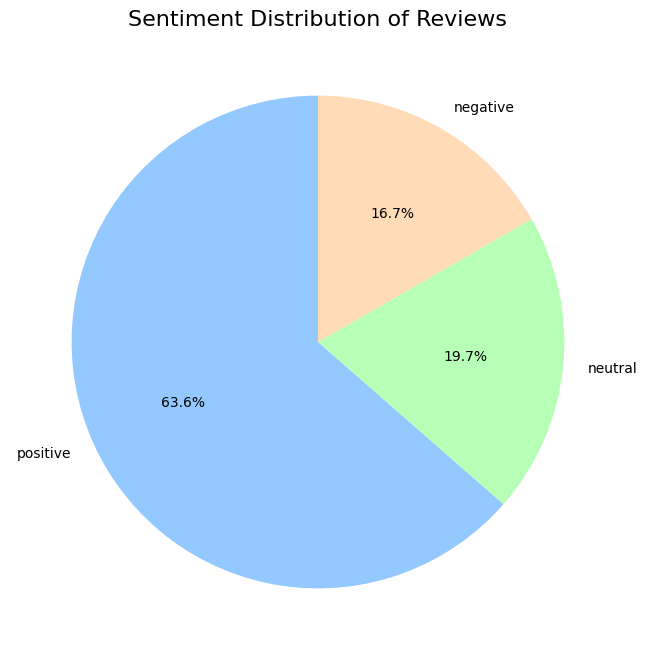

In [ ]:
# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,  # Labels for each sentiment
        autopct='%1.1f%%',  # Show percentages
        startangle=90,  # Start the chart at 90 degrees
        colors=['#66b3ff', '#99ff99', '#ffcc99'],  # Colors for each sentiment
        wedgeprops={'alpha': 0.7})  # Transparency for the pie slices

# Add a title to the chart
plt.title('Sentiment Distribution of Reviews', fontsize=16)

# Display the pie chart
plt.show()

In [ ]:
# Filter only positive sentiment and display the corresponding 'cleaned_review'
positive_reviews = cleaned_dutch_reviews_df[cleaned_dutch_reviews_df["overall_sentiment"] == "positive"][["Reviews", "overall_sentiment"]]


In [ ]:
positive_reviews.head(3)

,Reviews,overall_sentiment
1,"- Nadat hun zoons zijn veroordeeld tot levenslang in de gevangenis, krijgen Adelle (Debbie Reynolds) en Helen (Shirley Winters) bedreigende telefoontjes omdat iemand vindt dat hun zoons er gemakkelijk vanaf zijn gekomen. Het tweetal besluit naar Californië te verhuizen om aan de publiciteit van het proces te ontsnappen en een nieuw leven te beginnen. Ze starten een dansschool die al snel zeer succesvol is. Een van de studenten heeft een rijke, ongehuwde vader op wie Adelle al snel verliefd wordt. Ondertussen is Helen druk bezig met het grootbrengen van konijnen en wordt ze een beetje te verliefd op een evangelist op de radio. Het is slechts een kwestie van tijd voordat alles uit elkaar valt en de vrouwen een wereld van waanzin en moord betreden.<br /><br />- Ik kan het niet laten om What's the Matter te vergelijken met Helen? aan Whoever Slew Auntie Roo?, met ook Shelly Winters in de hoofdrol. Waar die film bijna ingetogen leek in de presentatie van de waanzin van tante Roo, is er niets dat Helen tegenhoudt in deze film. Het kan een groot deel van de speelduur van de film in beslag nemen, maar zodra ze snapt, is Helen een Bad Mad Mutha. Je wilt geen ruzie met haar maken. Winters is zo heerlijk dementerend dat ik onmogelijk niet van haar optreden kon genieten. Ik ga de film niet bederven, maar de dingen waartoe Helen in staat is totaal overdreven.<br /><br />- Hoe goed Winters ook is, Reynolds is volkomen belachelijk in haar rol als het goud -gravende tapdanser. Ik kreeg de indruk dat ze dacht dat ze in een film speelde waarvoor ze genomineerd zou worden voor een of andere prijs. Dit is geen burger Kane! Houd op met zo serieus te doen. Hé, Debbie, besef je niet dat het je voornaamste doel is om slachtoffer te worden van Winters' waanzin.<br /><br />- Ik hou gewoon van deze voormalige vrouwelijke sterren in de schemering- horrorfilms uit hun carrière. Wat is er met Helen aan de hand? is net zo leuk als wat dan ook.",positive
5,"(bevat kleine spoilers)<br /><br />Het is interessant hoe Anthony Mann hier James Stewart gebruikt. Stewart wordt door velen natuurlijk herinnerd als George Bailey uit Frank Capra's ""It's a Wonderful Life"", dus het is gemakkelijk om parallellen tussen de twee films te vinden. In ""It's a Wonderful Life"" krijgt Bailey de wereld te zien zoals deze zou zijn geweest als hij nooit was geboren. In ""The Far Country"" krijgt Stewart's Jeff Webster, door zich niet in te laten met het helpen van iemand anders (behalve hijzelf), in wezen hetzelfde te zien: een wereld waarin hij (ondanks alle praktische zaken) niet bestaat.<br /><br />Door er niet bij betrokken te raken (en door te proberen om niemand iets te geven), wordt Webster gedwongen om te zien hoe degenen voor wie hij niets anders kan doen dan zorg krijgen, gewond raken, rondgeduwd worden en zelfs vermoord worden terwijl hij toekijkt en doet niets. Dit doet de kijker denken aan George Bailey die kijkt naar een wereld die op zijn kop staat, omdat hij ook heeft besloten er niet bij betrokken te raken door nooit geboren te zijn. <br /><br />Beide films eindigen met hetzelfde beeld: een close-up van een rinkelende bel. Stewart heeft, door zijn filosofie van niet-betrokkenheid om te draaien, zijn vleugels verdiend.",positive
6,"(Geen spoilers, alleen plotdetails) Ik kan zo'n haat voor deze aflevering niet begrijpen. Wil je een slechte aflevering van Smallville zien? Kijk Subterranean  nu is er een zak onzin. Tom Welling levert een goede prestatie (dat zeg ik niet zo vaak), en Michael Rosenbaum is geweldig, maar dat is hij meestal wel. Het alternatieve universumscenario lijkt griezelig realistisch. The Martian Manhunter, die eerder in ""Static"" verscheen, keert terug en vertelt Clark dat de dokter die het hoofd is van het gekkenhuis waar ze worden vastgehouden eigenlijk een spook uit de fantoomzone is, en als Clark wil terugkeren naar zijn universum, moet hij hem doden. Over het algemeen een geweldige aflevering, met goed actee

In [ ]:
# Filter only negative sentiment and display the corresponding 'cleaned_review'
negative_reviews = cleaned_dutch_reviews_df[cleaned_dutch_reviews_df["overall_sentiment"] == "negative"][["Reviews", "overall_sentiment"]]


In [ ]:
negative_reviews.head(2)

,Reviews,overall_sentiment
0,"- Jim Blandings (Cary Grant) is de ratrace en de krappe levensomstandigheden van New York City beu geworden en vindt een huis op het platteland voor zijn vrouw en kinderen. Hij hoopt het eenvoudige leven te vinden. Maar een huis bouwen blijkt allesbehalve eenvoudig. Terwijl de hoofdpijn en de rekeningen zich opstapelen, geldt dat ook voor het lachen. Zal meneer Blanding ooit zijn droomhuis krijgen? <br /><br />- Wat deze film zo speciaal maakt, zijn de drie hoofdacteurs: Grant, Myrna Loy en Melvyn Douglas. Alle drie zijn in staat om op zichzelf een film te maken, dus als je hun talenten combineert, is bijna elke scène speciaal. Grant is altijd mijn favoriet geweest in dit soort rollen. Hij is zo goed in het spelen van de opgedragen echtgenoot. Loy is altijd een genot om naar te kijken. De Thin Man-films die ze samen met William Powell maakte zijn bijna perfect. En Douglas is de afgelopen twee of drie jaar een favoriet van mij geworden. Douglas verscheen ook in The Old Dark House, een van mijn favorieten.<br /><br />- De film is absoluut een product van zijn tijd. Ik krijg er een kick van als ik me een tijd kan voorstellen waarin je een huis van twee verdiepingen, drie slaapkamers en vier badkamers zou kunnen bouwen met een inkomen van $ 15.000 per jaar. Tel daar nog bij dat je twee kinderen naar een privéschool gaan en dat je een inwonende meid hebt, en het wordt bijna fantasievol.<br /><br />- Maar voor iedereen die een huis heeft gekocht of gebouwd, zijn veel van de situaties en de hachelijke situatie waarin de Blanding zich bevindt, is gemakkelijk te relateren aan vandaag. En dat is waar de komedie om de hoek komt kijken. Hoeveel mensen hebben enkele van de domme dingen gedaan die het stel in deze film doet, om uiteindelijk meer geld te kosten dan verwacht? - De grootste klacht die ik heb over meneer Blandings is het hele subplot 'vrouw verliefd op beste vriend'. Het is echt niet nodig voor de plot en voelt misplaatst en erg ongemakkelijk zoals gepresenteerd.",negative
4,"""Strange Case"" is niet het meest succesvolle televisieproject dat John Cleese ooit heeft gemaakt en heeft het gevoel van een eerste versie die met spoed in productie werd genomen voordat er enige herziening kon worden aangebracht. Er zitten een paar dwaze ideeën in en zelfs een paar slimme, maar het verhaal als geheel voegt helaas niet veel toe.<br /><br />Arthur Lowe is echter een giller, net als Dr. Watson, bionisch beetjes en al. ""Goede Heer.""",negative


In [ ]:
# Filter only neutral sentiment and display the corresponding 'cleaned_review'
neutral_reviews = cleaned_dutch_reviews_df[cleaned_dutch_reviews_df["overall_sentiment"] == "neutral"][["Reviews", "overall_sentiment"]]


In [ ]:
neutral_reviews.head(2)

,Reviews,overall_sentiment
11,"** Waarschuwing: dit bericht kan spoilers bevatten **<br /><br />Ik kreeg pas in september 2005 een Gamecube en de eerste twee games die ik kocht waren James Bond-games, het fatsoenlijke Agent Under Fire en het saaie Goldeneye Rogue Tussenpersoon. Het volgende spel dat ik wilde kopen was Alles of Niets, omdat mijn vriend me vertelde dat het beter was dan de twee spellen die ik al had. Ik moet zeggen: hij had gelijk. <br /><br />Ik kocht dit voor een tientje in HMV, en toen ik thuiskwam, stopte ik het in mijn Cube en speelde het urenlang. Het was veel beter dan mijn andere twee games, en er was een veel betere en interessantere verhaallijn. De graphics waren enkele van de beste die ik ooit heb gezien (maar nu de XBOX 360 uit is, heeft Farcry Instincts Predator enkele van de beste graphics die de mensheid kent). De verhaallijn was slim; gekke man (Willem Dafoe, genaamd Nikolai Diavolo) en mooie handlanger (Heidi Klum, genaamd Katya Nadanova), proberen de wereld te vernietigen met kleine nanobots, die jij, James Bond, aan het begin van het spel moet vernietigen een trein. Het slechte is dat een van hen verborgen zit in Katya's borsten. Je moet dan hun plannen dwarsbomen en de wereld redden.<br /><br />Het mooie van dit spel is dat het daadwerkelijk acteurs heeft die de personages inspreken, zoals Cleese die Q uitspreekt. Er zijn 27 niveaus, waarvan sommige kort en sommige behoorlijk lang en lastig.<br /><br />Gameplay - 10/10 Graphics - 9/10 Geluid - 9/10 Herspeelwaarde - 7/10 Multiplayer - 8/10<br /><br />Ik geef dit spel een totaal van 90%",neutral
14,"**** = Een meesterwerk om in de boeken te worden vastgelegd en nooit te vergeten<br /><br />***1/2 = Een klassieker in de tijd; gewoon een must-see<br /><br />*** = Een solide, de moeite waard en zeer vermakelijk stuk<br /><br />**1/2 = Een goede film, maar er zijn enkele ongelijke elementen of opvallende gebreken<br /><br />** = Kan op sommige vlakken nog steeds als goed worden beschouwd, maar dit werk heeft ernstige problemen of wordt beperkt door onvermijdelijke elementen die als onontkoombaar worden beschouwd (bijvoorbeeld het genre)<br /><br /> *1/2 = Meestal een hoop niets waar door wordt aangewakkerd licht waardevolle momenten<br /><br />BOMB = Niet van zichtbare kwaliteit<br /><br />- Kalifornia = ***<br /><br />- Niet beoordeeld (voor sterk gewelddadig materiaal, aanzienlijke seksualiteit , en taal)<br /><br />Ik huurde deze film in de verwachting dat Brad Pitt's gezicht in-your-face zomer-Blockbuster-kwaliteit zou worden gevierd, maar ik was blij verrast en teleurgesteld. Dit is eigenlijk meer een drama, en bovendien heel grimmig... Ik herinner me enkele emotioneel intense voice-overs van Duchovny.<br /><br />Pitt speelt zijn mogelijk niet-meest sexy film ooit met verrassend talent. Die begon als een hopeloze maar ongevaarlijke white trash-echtgenoot werd gerealiseerd als een gewelddadige, verontrustende alcoholist met een verwarde geest. Tijdens sommige van de laatste fasen van de film vond ik het moeilijk om naar hem te blijven kijken; hij was onvoorspelbaar en eng. Dit getuigt van zeer goed schrijf- en acteerwerk.<br /><br />De hele film is gevuld met bizarre, sensationele scènes waardoor ik niet minder dan één keer mijn adem inhield, en dan bedoel ik niet de actiescènes. Ik bedoel dialoogscènes die zo briljant zijn gemaakt dat ik eigenlijk huiverde en naar adem snakte bij wat ik zag. Het was alsof je een neushoorn en een leeuw in een kooi zag zitten en toekeek hoe ze elkaar doodknaagden. Nogmaals, ik ben erg onder de indruk van de scenarioschrijver(s); wie het ook zijn, deed het onmogelijke: olie en water mengen.<br /><br />Ik heb ook erg genoten van het optreden van Juliette Lewis. Het komt tegenwoordig zo zelden voor dat deze getalenteerde jonge actrice verschijnt, dat het zo leuk is als ze dat doet. Sommige van haar momenten in deze film brachten me tot tranen. Dat bedoel ik. De emoties die dit meisje in je hoofd kan opwekken zijn